In [19]:
import torch
torch.__version__

'1.13.1+cpu'

In [20]:
from torch.utils.data import Dataset, DataLoader
# transforms 전처리 때 사용하는 메소드

MNIST 데이터셋 가져오기

In [21]:
import torchvision.transforms as transforms
from torchvision import datasets

In [22]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,),std=(1.0,))])

In [23]:
trainset = datasets.MNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛',
                          train=True, download=True, transform=mnist_transform)

In [24]:
testset = datasets.MNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛',
                          train=False, download=True, transform=mnist_transform)

In [25]:
# 배치만큼 데이터 가지고 오기
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [26]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape
# 28 x 28 이미지, 이미지 커널 1개이므로 흑백, batch size = 8

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [27]:
# 이미지 차원 축소, 0차원 축소 => 8개 배치 데이터 중 한 개만 가져옴
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

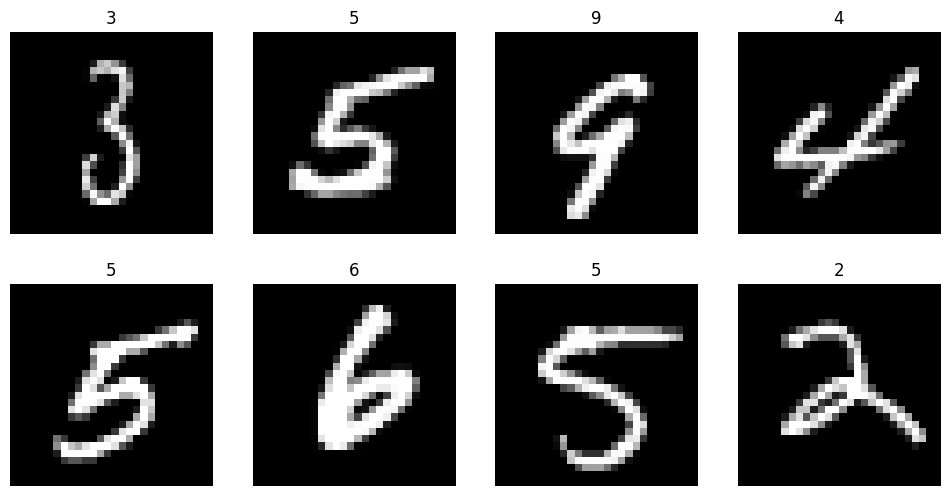

In [28]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(trainset),size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray') # img.squeeze()를 통해 차원을 2차원을 맞춰줘야 한다.
plt.show()

신경망 구성
layer : 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
module : 한 개 이상의 계층이 모여서 구성
model : 한 개 이상의 모듈이 모여서 구성

torch.nn 패키지
가중치와 편향값들이 내부에서 자동으로 생성되는 레이어를 사용할 때 이용한다.

In [29]:
import torch.nn as nn
import torch

In [30]:
# 예제
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output.size())

tensor([[-1.4698,  0.7711,  0.7055,  ..., -0.9698,  0.2457,  0.8929],
        [-0.4836, -0.1857, -0.7432,  ..., -0.4165, -0.0866,  0.3535],
        [ 0.9742,  0.9144,  0.4532,  ..., -0.9713, -0.1153, -0.7131],
        ...,
        [ 0.7910,  0.9002,  1.3761,  ...,  0.5175, -0.1890, -0.8565],
        [-1.0853,  0.6252,  0.5511,  ...,  1.7487, -1.3597,  0.2430],
        [-0.6097,  0.3978,  1.2296,  ...,  0.1759,  0.6086,  0.2838]])
Linear(in_features=20, out_features=30, bias=True)
torch.Size([128, 30])


In [31]:
# 컨볼루션 예제
input = torch.randn(20,16,50,100)
m = nn.Conv2d(16,33, 3, stride=2)
m = nn.Conv2d(16,33, (3,5), stride=(2,1),padding=(4,2))
m = nn.Conv2d(16,33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [32]:
output = m(input)
output.size()

torch.Size([20, 33, 26, 100])

In [33]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [34]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))

In [35]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [36]:
# weight는 detach()를 통해 꺼내줘야 numpy() 변환 가능

weight = weight.detach()

In [37]:
# numpy() 변환 가능
weight = weight.numpy()

In [55]:
import numpy as np
np.squeeze(weight[0]).shape

(5, 5)

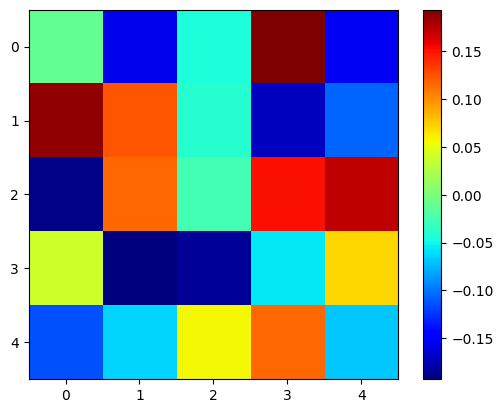

In [38]:
# 컨볼루션 계층 하나의 weight 값을 가져와서 컬러로 표현
from matplotlib import pyplot as plt
plt.imshow(weight[0,0,:,:],'jet')   # 5 x 5 만 선택, 'jet' : 컬러
plt.colorbar()
plt.show()

In [39]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
input_image.size()

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])


torch.Size([28, 28])

In [41]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())    # 1 1 28 28

output_data = layer(input_data) # layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
print('output_data', output_data.shape)   # 객체로 grad도 포함되어있음
output = output_data.data       # data값만 가져옴, shape 일치
print('output', output.shape)
output_np = output.numpy()
output_np.shape

torch.Size([1, 1, 28, 28])
output_data torch.Size([1, 20, 24, 24])
output torch.Size([1, 20, 24, 24])


(1, 20, 24, 24)

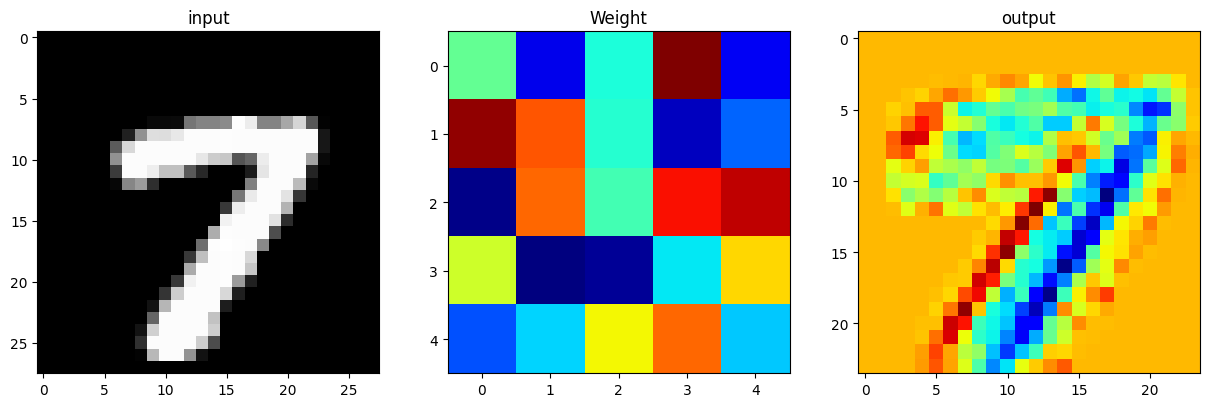

In [60]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')    # input_image: 28,28
# print(input_image.shape)

plt.subplot(132)
plt.title('Weight')
# plt.imshow(np.squeeze(weight[0]), 'gray')
plt.imshow(weight[0,0,:,:], 'jet')     # 뒤의 것만 쓰겠다.

plt.subplot(133)
plt.title('output')
plt.imshow(output[0,0,:,:],'jet')

In [62]:
# 풀링 계층
import torch.nn.functional as F

pool = F.max_pool2d(output,2,2)
output.shape, pool.shape        # 2x2 이므로 반쪽이 되었음을 확인할 수 있다.

(torch.Size([1, 20, 24, 24]), torch.Size([1, 20, 12, 12]))

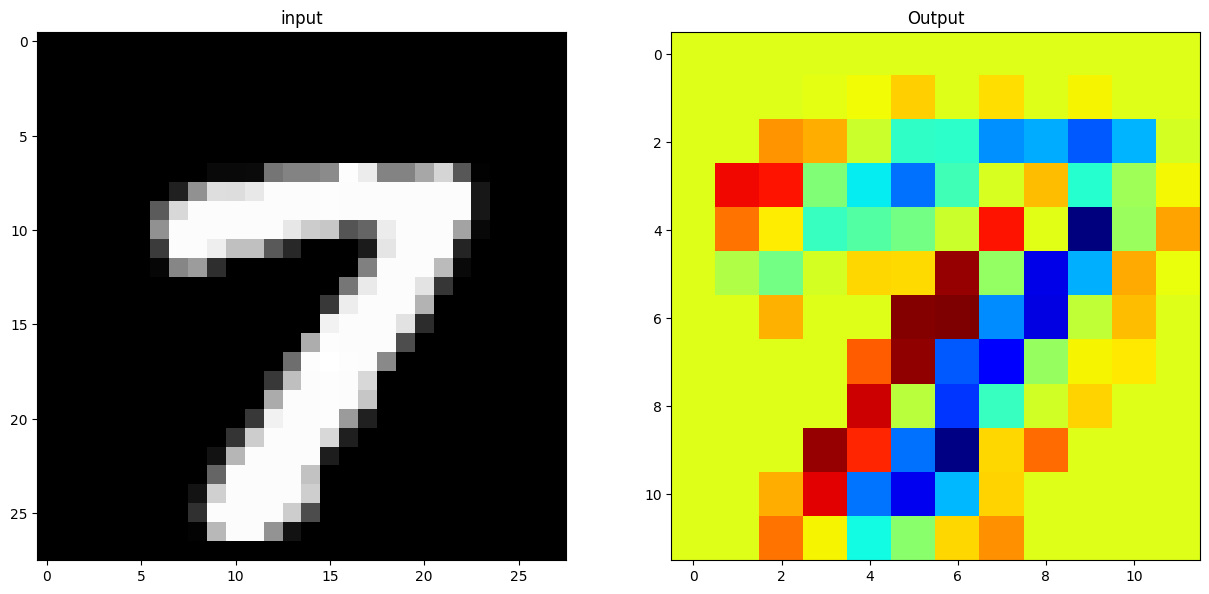

In [64]:
plt.figure(figsize=(15,30))

plt.subplot(121)
plt.title('input')
plt.imshow(input_image, 'gray')    # input_image: 28,28
# print(input_image.shape)

plt.subplot(122)
plt.title('Output')
# plt.imshow(np.squeeze(weight[0]), 'gray')
plt.imshow(pool[0,0,:,:], 'jet')     # 뒤의 것만 쓰겠다.


In [65]:
# 선형 레이어 (Linear layers)
flatten = input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [68]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [69]:
lin

tensor([[-0.2105, -0.6277,  0.4226,  0.0924, -0.5592, -0.1351, -0.0680, -0.3101,
          0.2828,  0.1357]], grad_fn=<AddmmBackward0>)

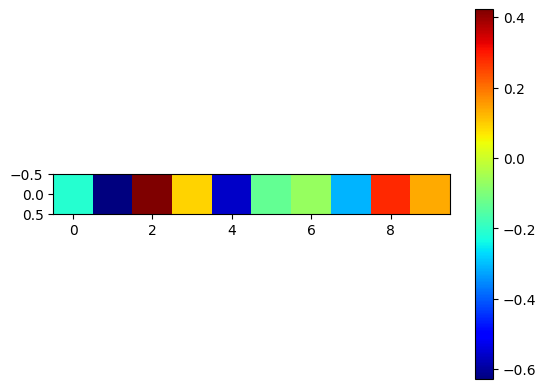

In [73]:
plt.imshow(lin.detach(),'jet')
plt.colorbar()

In [74]:
# 비선형 활성화
with torch.no_grad():
    flatten = input_image.view(1,28*28)
    lin = nn.Linear(784,10)(flatten)
    softmax = F.softmax(lin, dim=1)
softmax

tensor([[0.0822, 0.1267, 0.0856, 0.1227, 0.0614, 0.0898, 0.0975, 0.1527, 0.0761,
         0.1054]])

In [77]:
torch.argmax(softmax) # 7번이 가장 높다.

tensor(7)

In [78]:
# 렐루
inputs = torch.randn(4,3,28,28)
layer = nn.Conv2d(3,20,5,1)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

In [79]:
# 모델 정의, nn.Module

# nn.Module
# __init__()
# forward()

In [ ]:
class Model(nn.Module):
    def __init__(self, inputs):
        